# Tarea Integracion Fuentes de Datos: Perfilamiento de Datos
## Francisco Martino, David Romero Acosta, Edgar García
### Modelamiento de Datos y ETL

Este ejercicio se realizó mediante el apoyo del software Python. Con uso de las librerías `pandas` y `seaborn` para la graficación de los elementos. El paquete `missingno` se utilizará como apoyo para la verificación de los contenidos de los datos de los archivos.

In [3]:
# Importación de librerías
import pandas as pd
import seaborn as sns
import missingno as msno ###
import numpy as np

## 1. Inspección de archivos

Como fuente externa se usaron datos del DANE con respecto a los indicadores de pobreza por departamento y municipio, los cuales se encuentran resumidos en el archivo `TerriData_Dim14.xlsx`.

In [20]:
externa = pd.read_excel("TerriData_Dim14.xlsx")
externa.drop(index=externa.index[0], axis=0, inplace=True)
externa['Dato Numérico'] = externa['Dato Numérico'].str.replace(',','.').astype('float')

## 1.1. Fuente Externa

In [9]:
externa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18276 entries, 1 to 18276
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Código Departamento  18276 non-null  float64
 1   Departamento         18276 non-null  object 
 2   Código Entidad       18276 non-null  float64
 3   Entidad              18276 non-null  object 
 4   Dimensión            18276 non-null  object 
 5   Subcategoría         18276 non-null  object 
 6   Indicador            18276 non-null  object 
 7   Dato Numérico        16526 non-null  object 
 8   Dato Cualitativo     0 non-null      float64
 9   Año                  18276 non-null  float64
 10  Mes                  18276 non-null  float64
 11  Fuente               18276 non-null  object 
 12  Unidad de Medida     18276 non-null  object 
dtypes: float64(5), object(8)
memory usage: 2.0+ MB


El archivo de datos contiene 13 columnas y 18276 filas con datos.

In [22]:
columnas_cat_externa = externa.describe(exclude = np.number).columns
externa.describe(exclude = np.number)

,Departamento,Entidad,Dimensión,Subcategoría,Indicador,Fuente,Unidad de Medida
count,18276,18276,18276,18276,18276,18276,18276
unique,34,1044,1,5,19,3,3
top,Antioquia,Arauca,Pobreza,Indicadores de pobreza,Índice de pobreza multidimensional - IPM,DANE,Porcentaje (el valor está multiplicado por 100)
freq,1569,199,18276,15204,2235,9534,11663


In [23]:
columnas_num_externa = externa.describe(include = np.number).round(2).columns
externa.describe(include = np.number).round(2)


,Código Departamento,Código Entidad,Dato Numérico,Dato Cualitativo,Año,Mes
count,18276.00,18276.00,16526.00,0.0,18276.00,18276.00
mean,42.06,42349.03,30.69,NaN,2013.64,11.99
std,28.40,28343.03,27.27,NaN,5.41,0.09
min,1.00,1001.00,0.00,NaN,2002.00,11.00
25%,17.00,17000.75,6.38,NaN,2010.00,12.00
50%,41.00,41026.00,23.50,NaN,2017.00,12.00
75%,68.00,68324.00,49.57,NaN,2018.00,12.00
max,99.00,99773.00,100.00,NaN,2018.00,12.00


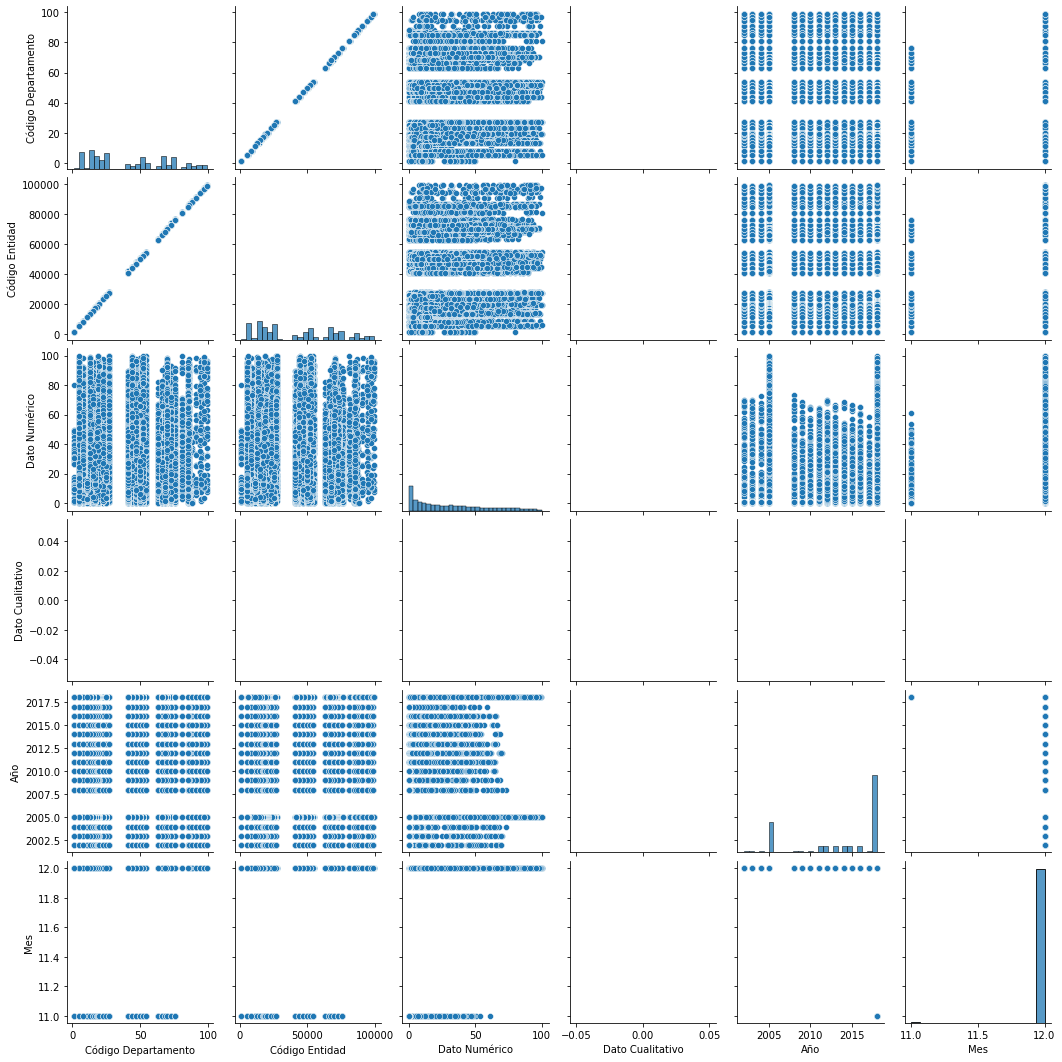

In [25]:
sns.pairplot(externa[columnas_num_externa])

In [24]:
externa.duplicated().any()

False

<AxesSubplot:>

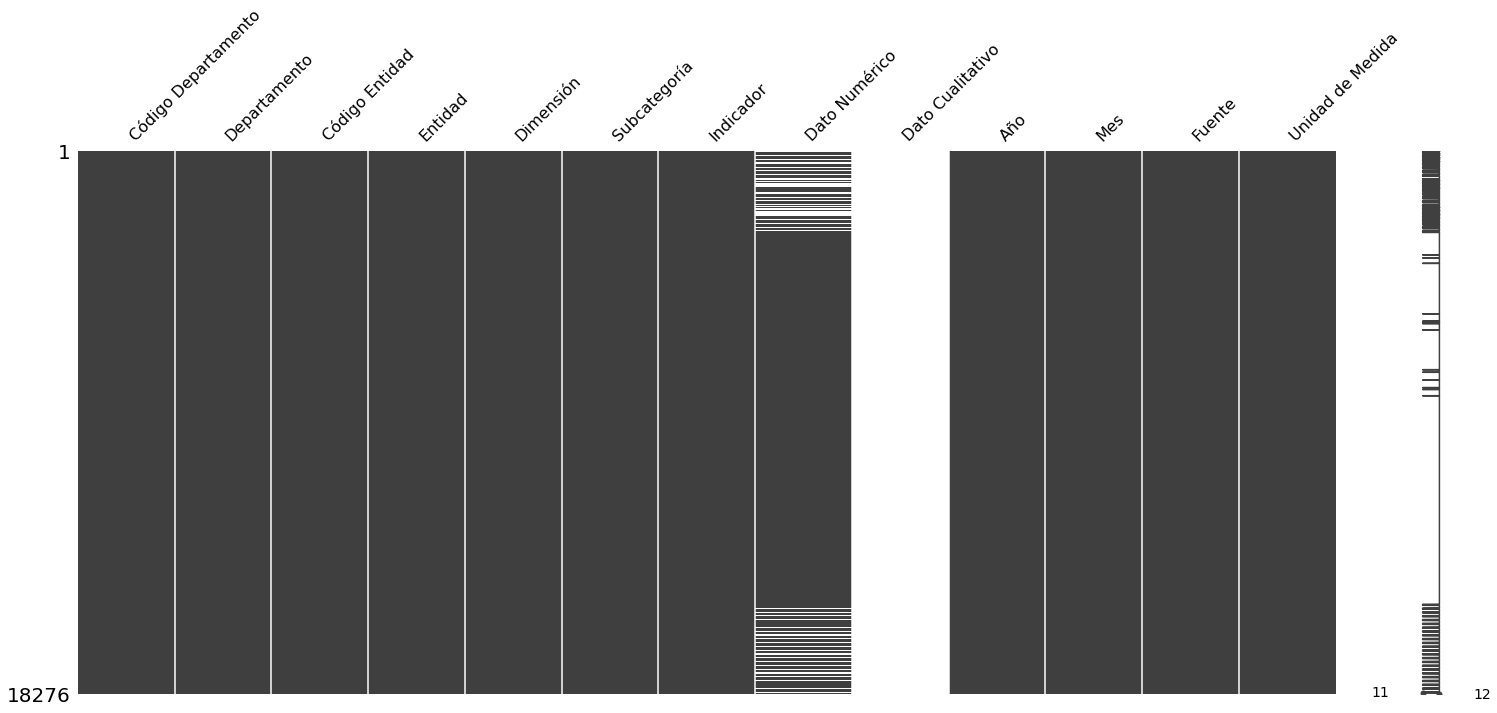

In [26]:
msno.matrix(externa)